In [1]:
%matplotlib ipympl
import mpl_interactions.ipyplot as iplt
import matplotlib.pyplot as plt
import numpy as np

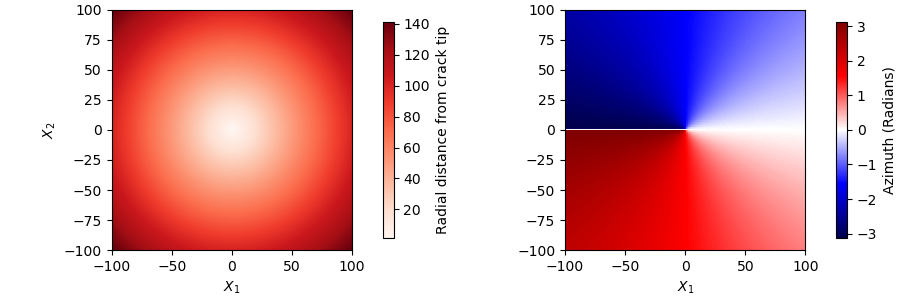

In [3]:
plt.close()
# First we make our 2D grid in the x1-x2 plane, where the crack is propagating in the x1 direction
x1min = -100
x1max = 100
x2min = -100
x2max = 100
x1 = np.linspace(-100,100,100)
x2 = np.linspace(-100,100,100)
X1, X2 = np.meshgrid(x1,x2)

# Elastic properties
nu = 0.25                          # Poisson's ratio
cpcs = np.sqrt(2*(1-nu)/(1-2*nu))  # ratio of dilatational to shear wave speed

# We will plot the radial distance and angle with respect to the crack tip
R = np.sqrt( X1*X1 + X2*X2)        # Radial distance 
th = np.arctan2(X2,X1)             # Azimuth (radians)

cbscale = 0.9
fig = plt.figure(constrained_layout=True)
fig.set_size_inches(9,3)
gs=fig.add_gridspec(1,2)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
pos1 = ax1.imshow(R,cmap='Reds',extent=[x1min,x1max,x2min,x2max])
clb = plt.colorbar(pos1,ax=ax1,shrink=cbscale)
clb.set_label('Radial distance from crack tip')
ax1.set_xlabel('$X_1$')
ax1.set_ylabel('$X_2$')
pos2=ax2.imshow(th,cmap='seismic',extent=[x1min,x1max,x2min,x2max])
clb2 = plt.colorbar(pos2,ax=ax2,shrink=cbscale)
ax2.set_xlabel('$X_1$')
clb2.set_label('Azimuth (Radians)')

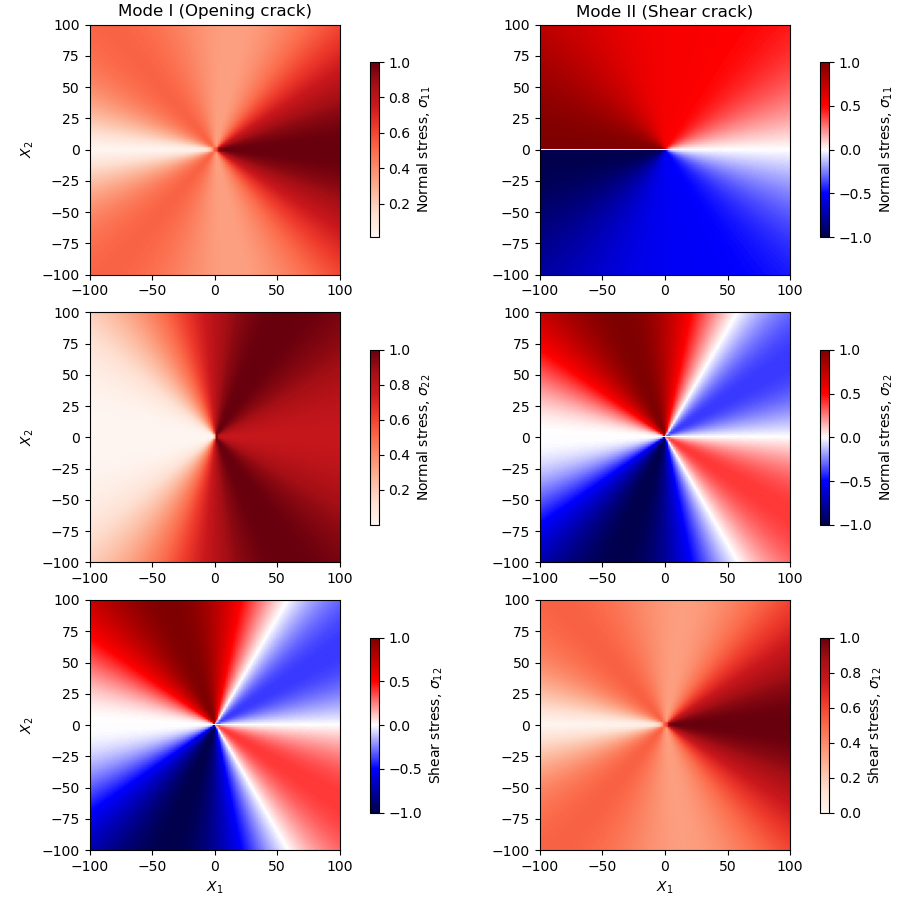

In [5]:
plt.close()
# Define some functions to compute the different components of the stress fields around the crack tip
def RelTerms(V):
    als = np.sqrt(1-V**2)              # V = Vrupt / cs
    vd = V/cpcs                        # v/cs * 1/(cp/cs) = v/cp
    ald = np.sqrt(1-vd**2)
    Dv = 4*als*ald - (1+als*als)**2
    gamd = np.sqrt(1-(vd*np.sin(th))**2)
    gams = np.sqrt(1-( V*np.sin(th))**2)
    th_s = np.arctan2(np.sin(th)*als,np.cos(th))
    th_d = np.arctan2(np.sin(th)*ald,np.cos(th))
    return als, vd, ald, Dv, th_s, th_d, gamd, gams

# Mode I, Sigma_11
def nM1sig11(V):
    als, vd, ald, Dv, th_s, th_d, gamd, gams = RelTerms(V)
    sig11v =  1/Dv* ((1+als**2)*(1+2*ald**2-als**2)*np.cos(0.5*th_d)/np.sqrt(gamd) \
            - 4*als*ald*np.cos(0.5*th_s)/np.sqrt(gams))
    return sig11v/np.max(np.abs(sig11v))
# Mode I, Sigma_22
def nM1sig22(V):
    als, vd, ald, Dv, th_s, th_d, gamd, gams = RelTerms(V)
    sig22v =  -1/Dv*(((1+als*als)**2)*np.cos(0.5*th_d)/np.sqrt(gamd) \
              -4*als*ald*np.cos(0.5*th_s)/np.sqrt(gams))
    return sig22v/np.max(np.abs(sig22v))
# Mode I, Sigma_12
def nM1sig12(V):
    als, vd, ald, Dv, th_s, th_d, gamd, gams = RelTerms(V)
    sig12v =  (2*ald*(1+als*als))/Dv * (np.sin(0.5*th_d)/np.sqrt(gamd) \
                                       -np.sin(0.5*th_s)/np.sqrt(gams))
    return sig12v/np.max(np.abs(sig12v))
# Mode II, Sigma_11
def nM2sig11(V):
    als, vd, ald, Dv, th_s, th_d, gamd, gams = RelTerms(V)
    sig11v =  -2*als/Dv* ((1+2*ald**2-als**2)*np.sin(0.5*th_d)/np.sqrt(gamd) \
            - (1+als**2)*np.sin(0.5*th_s)/np.sqrt(gams))
    return sig11v/np.max(np.abs(sig11v))
# Mode II, Sigma_22
def nM2sig22(V):
    als, vd, ald, Dv, th_s, th_d, gamd, gams = RelTerms(V)
    sig22v =  (2*als*(1+als*als))/Dv * (np.sin(0.5*th_d)/np.sqrt(gamd) \
                                       -np.sin(0.5*th_s)/np.sqrt(gams))
    return sig22v/np.max(np.abs(sig22v))
# Mode II, Sigma_12
def nM2sig12(V):
    als, vd, ald, Dv, th_s, th_d, gamd, gams = RelTerms(V)
    sig12v =  1/Dv* (4*ald*als*np.cos(0.5*th_d)/np.sqrt(gamd) \
            - ((1+als**2)**2)*np.cos(0.5*th_s)/np.sqrt(gams))
    return sig12v/np.max(np.abs(sig12v))

# TO DO: plot line on maximum hoop stress
# Plot the energy release as a function of rupture speed = subRayleigh, super shear
fig = plt.figure(constrained_layout=True)
fig.tight_layout
fig.set_size_inches(9,9)
gs=fig.add_gridspec(3,2)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[2,0])
ax6 = fig.add_subplot(gs[2,1])
controls = iplt.imshow(nM1sig11,V=(0.001,0.91),ax=ax1,cmap='Reds',extent=[x1min,x1max,x2min,x2max])
clb = plt.colorbar(ax=ax1,shrink=0.7)
clb.set_label('Normal stress, $\sigma_{11}$')
ax1.set_title('Mode I (Opening crack)')
ax1.set_ylabel('$X_2$')

iplt.imshow(nM2sig11,controls = controls,ax=ax2,cmap='seismic',extent=[x1min,x1max,x2min,x2max])
clb = plt.colorbar(ax=ax2,shrink=0.7)
clb.set_label('Normal stress, $\sigma_{11}$')
ax2.set_title('Mode II (Shear crack)')

iplt.imshow(nM1sig22,controls = controls,ax=ax3,cmap='Reds',extent=[x1min,x1max,x2min,x2max])
clb = plt.colorbar(ax=ax3,shrink=0.7)
clb.set_label('Normal stress, $\sigma_{22}$')
ax3.set_ylabel('$X_2$')

iplt.imshow(nM2sig22,controls = controls,ax=ax4,cmap='seismic',extent=[x1min,x1max,x2min,x2max])
clb = plt.colorbar(ax=ax4,shrink=0.7)
clb.set_label('Normal stress, $\sigma_{22}$')

iplt.imshow(nM1sig12,controls = controls,ax=ax5,cmap='seismic',extent=[x1min,x1max,x2min,x2max])
clb = plt.colorbar(ax=ax5,shrink=0.7)
clb.set_label('Shear stress, $\sigma_{12}$')
ax5.set_xlabel('$X_1$')
ax5.set_ylabel('$X_2$')

iplt.imshow(nM2sig12,controls = controls,ax=ax6,cmap='Reds',extent=[x1min,x1max,x2min,x2max],vmin=0,vmax=1)
clb = plt.colorbar(ax=ax6,shrink=0.7)
ax6.set_xlabel('$X_1$')
clb.set_label('Shear stress, $\sigma_{12}$')

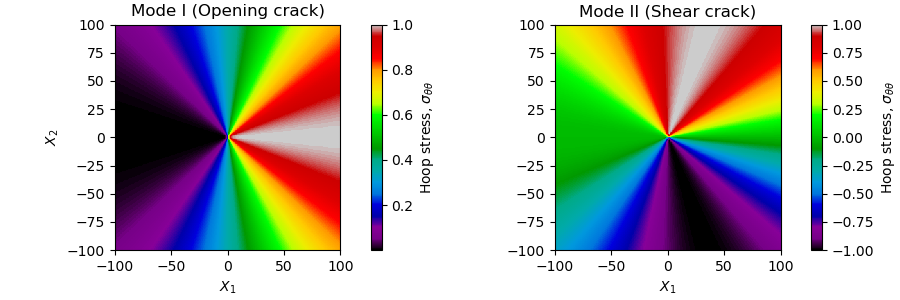

In [6]:
plt.close()
def RelTerms(V):
    als = np.sqrt(1-V**2)              # V = Vrupt / cs
    vd = V/cpcs                        # v/cs * 1/(cp/cs) = v/cp
    ald = np.sqrt(1-vd**2)
    Dv = 4*als*ald - (1+als*als)**2
    gamd = np.sqrt(1-(vd*np.sin(th))**2)
    gams = np.sqrt(1-( V*np.sin(th))**2)
    th_s = np.arctan2(np.sin(th)*als,np.cos(th))
    th_d = np.arctan2(np.sin(th)*ald,np.cos(th))
    return als, vd, ald, Dv, th_s, th_d, gamd, gams

# Mode I, Sigma_11
def M1sig11(V):
    als, vd, ald, Dv, th_s, th_d, gamd, gams = RelTerms(V)
    sig11v =  1/Dv* ((1+als**2)*(1+2*ald**2-als**2)*np.cos(0.5*th_d)/np.sqrt(gamd) \
            - 4*als*ald*np.cos(0.5*th_s)/np.sqrt(gams))
    return sig11v
# Mode I, Sigma_22
def M1sig22(V):
    als, vd, ald, Dv, th_s, th_d, gamd, gams = RelTerms(V)
    sig22v =  -1/Dv*(((1+als*als)**2)*np.cos(0.5*th_d)/np.sqrt(gamd) \
              -4*als*ald*np.cos(0.5*th_s)/np.sqrt(gams))
    return sig22v
# Mode I, Sigma_12
def M1sig12(V):
    als, vd, ald, Dv, th_s, th_d, gamd, gams = RelTerms(V)
    sig12v =  (2*ald*(1+als*als))/Dv * (np.sin(0.5*th_d)/np.sqrt(gamd) \
                                       -np.sin(0.5*th_s)/np.sqrt(gams))
    return sig12v
# Mode II, Sigma_11
def M2sig11(V):
    als, vd, ald, Dv, th_s, th_d, gamd, gams = RelTerms(V)
    sig11v =  -2*als/Dv* ((1+2*ald**2-als**2)*np.sin(0.5*th_d)/np.sqrt(gamd) \
            - (1+als**2)*np.sin(0.5*th_s)/np.sqrt(gams))
    return sig11v
# Mode II, Sigma_22
def M2sig22(V):
    als, vd, ald, Dv, th_s, th_d, gamd, gams = RelTerms(V)
    sig22v =  (2*als*(1+als*als))/Dv * (np.sin(0.5*th_d)/np.sqrt(gamd) \
                                       -np.sin(0.5*th_s)/np.sqrt(gams))
    return sig22v
# Mode II, Sigma_12
def M2sig12(V):
    als, vd, ald, Dv, th_s, th_d, gamd, gams = RelTerms(V)
    sig12v =  1/Dv* (4*ald*als*np.cos(0.5*th_d)/np.sqrt(gamd) \
            - ((1+als**2)**2)*np.cos(0.5*th_s)/np.sqrt(gams))
    return sig12v

# Mode I, hoop stress
def M1sigh(V):
    sig12v = M1sig12(V)
    sig22v = M1sig22(V)
    sig11v = M1sig11(V)
    sighv = sig11v*np.sin(th)**2 + sig22v*np.cos(th)**2 - 2*sig12v*np.cos(th)*np.sin(th)
    return sighv/np.max(np.abs(sighv))
# Mode I, largest principal stress
def M1sig1(V):
    sig12v = M1sig12(V)
    sig22v = M1sig22(V)
    sig11v = M1sig11(V)
    sigmax = 0.5*(sig11v+sig22v)+np.sqrt((0.5*(sig11v+sig22v))**2+sig12v**2)
    return sigmax/np.max(np.abs(sigmax))
# Mode I, Maximum shear stress
def M1maxshear(V):
    sig12v = M1sig12(V)
    sig22v = M1sig22(V)
    sig11v = M1sig11(V)
    sigmax = 0.5*(sig11v+sig22v)+np.sqrt((0.5*(sig11v+sig22v))**2+sig12v**2)
    sigmin = 0.5*(sig11v+sig22v)-np.sqrt((0.5*(sig11v+sig22v))**2+sig12v**2)
    taumax = 0.5*(sigmax - sigmin)
    return taumax/np.max(np.abs(taumax))
# Mode II, hoop stress
def M2sigh(V):
    sig12v = M2sig12(V)
    sig22v = M2sig22(V)
    sig11v = M2sig11(V)
    sighv = sig11v*np.sin(th)**2 + sig22v*np.cos(th)**2 - 2*sig12v*np.cos(th)*np.sin(th)
    return sighv/np.max(np.abs(sighv))
# Mode II, largest principal stress
def M2sig1(V):
    sig12v = M2sig12(V)
    sig22v = M2sig22(V)
    sig11v = M2sig11(V)
    sigmax = 0.5*(sig11v+sig22v)+np.sqrt((0.5*(sig11v+sig22v))**2+sig12v**2)
    return sigmax/np.max(np.abs(sigmax))
# Mode II, maximum shear stress
def M2maxshear(V):
    sig12v = M2sig12(V)
    sig22v = M2sig22(V)
    sig11v = M2sig11(V)
    sigmax = 0.5*(sig11v+sig22v)+np.sqrt((0.5*(sig11v+sig22v))**2+sig12v**2)
    sigmin = 0.5*(sig11v+sig22v)-np.sqrt((0.5*(sig11v+sig22v))**2+sig12v**2)
    taumax = 0.5*(sigmax - sigmin)
    return taumax/np.max(np.abs(taumax))

# TO DO: plot line on maximum hoop stress
# Plot the energy release as a function of rupture speed = subRayleigh, super shear
axscale = 1
fig = plt.figure(constrained_layout=True)
fig.set_size_inches(9,3)
gs=fig.add_gridspec(1,2)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax1.set_title('Mode I (Opening crack)')
ax2.set_title('Mode II (Shear crack)')

controls = iplt.imshow(M1sigh,V=(0.001,0.91),ax=ax1,cmap='nipy_spectral',extent=[x1min,x1max,x2min,x2max])
clb = plt.colorbar(ax=ax1,shrink=axscale)
clb.set_label('Hoop stress, $\sigma_{\\theta\\theta}$')
ax1.set_xlabel('$X_1$')
ax1.set_ylabel('$X_2$')

iplt.imshow(M2sigh,controls = controls,ax=ax2,cmap='nipy_spectral',extent=[x1min,x1max,x2min,x2max])
clb = plt.colorbar(ax=ax2,shrink=axscale)
ax2.set_xlabel('$X_1$')
clb.set_label('Hoop stress, $\sigma_{\\theta\\theta}$')
